# Домашнее задание №2 студентки группы 6112
# Щербина Елизаветы

Все задание выполнялось на языке программирования Python3 с использованием библиотек для работы с числами, графиками и таблицами. 

# Вариант 9

In [32]:
import numpy as np
import scipy as sc
import pandas as pd
from tqdm import trange
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# <font color='green'> Задача №1 </font>

# <font color='green'> Линейные системы уравнений. Устойчивость численных методов. </font>

Рассматривается система уравнений малых колебаний маятника:         
\begin{equation*}\dot{x} = \varepsilon\ x + 2y \\ \dot{y} = \varepsilon\ y - 2x\end{equation*}     
Начальные условия для системы: \begin{equation*} x(0)=y(0)=1, \varepsilon = 0,1 \end{equation*}  

### <font color=green> А. Точное решение системы </font> 

Точное решение системы однородных дифференциальных уравнений в точках *T =1, 10, 100, 1000* находим с помощью следующей формулы:

\begin{equation*}\begin{pmatrix} \ x \\y \end{pmatrix} = \begin{pmatrix}\ e^{0.1t}\\
\ e^{0.1t}\\\end{pmatrix}\begin{pmatrix}\ sin{2t}+cos{2t}\\ \ cos{2t}-sin{2t}\\\end{pmatrix}\end{equation*} 

In [33]:
t = 0
x_n = 1.0
y_n = 1.0

dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}
results_second = pd.DataFrame(data=data)
        
i = 0 
for i in range(4):
        x_n = math.exp(0.1*dots[i])*(math.sin(2*dots[i]) + math.cos(2*dots[i]))
        y_n = math.exp(0.1*dots[i])*(math.cos(2*dots[i]) - math.sin(2*dots[i]))

        results_second.at[i, 'X'] = str(x_n)
        results_second.at[i, 'Y'] = str(y_n)

In [34]:
results_second

,T,X,Y
0,1,0.5450156906076808,-1.4648424534098445
1,10,3.5909245385783413,-1.3723604322834528
2,100,-8504.630386587978,29966.675704974434
3,1000,1.5122808215252288e+43,-3.487829447249174e+43


### Б. Численные решения

Используя численные методы Эйлера (явный, неявный, с центральной точкой), явные методы Адамса порядка 3, 4 и Дормана-Принса, получить численные решения с шагом 0,01 для Т = 1, 10, 100, 1000. Объяснить полученные результаты. При использовании метода Адамса особое внимание обратить на переходной участок, где значения сеточной функции необходимо получать другим численным методом.

### <font color=green>  Явный метод Эйлера </font>

\begin{equation*} u_{n+1}(t + \tau) = u_n(t) + \tau f(t_n, u_n),  0 \leqslant t \leqslant N-1 \end{equation*}         

\begin{equation*} \left\{ \begin{aligned} \frac{x(t)}{dt} = 0,1x + 2y \\ \frac{y(t)}{dt} = -2x + 0,1y  \\ \begin{pmatrix} \ x \\y \end{pmatrix}(0) = \begin{pmatrix} 0 \\ 0 \end{pmatrix} \end{aligned} \right. \end{equation*}        

Результат вычислений представлен в таблице: T-точка, x, y - соответствующие координаты.

In [35]:
t = 0
x_n = 1.0
y_n = 1.0

dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}
results_Euler_first = pd.DataFrame(data=data)

i = 0 
while True:
        x_n_1 = x_n + 0.01*(0.1*x_n + 2*y_n)
        y_n_1 = y_n + 0.01*(-2*x_n + 0.1*y_n)
        x_n = x_n_1
        y_n = y_n_1
        t += 0.01
        
        if round(t, 3) == dots[i]:
            #print(i, dots[i], "x=", x_n, " y=", y_n)
            results_Euler_first.at[i, 'X'] = x_n
            results_Euler_first.at[i, 'Y'] = y_n
            i += 1
            
        if i >= 4:
            break

In [36]:
results_Euler_first

,T,X,Y
0,1,0.559355,-1.49303
1,10,4.41863,-1.57501
2,100,-109900,199786
3,1000,7.58441e+51,1.49805e+52


### <font color=green> Неявный метод Эйлера </font>

\begin{equation*} u_{n+1} = u_n(t) + \tau f(t_n, u_{n+1}),  0 \leqslant t \leqslant N-1 \Rightarrow  \end{equation*}    
\begin{equation*}\left\{\begin{aligned}\frac1\tau(x(t+\tau) - x(t)) = 0,1x(t + \tau) + 2y(t + \tau) \\\frac1\tau (y(t+\tau) - y(t)) = -2x(t + \tau) + 0,1y(t + \tau) \end{aligned} \right.  \Rightarrow \end{equation*} 

\begin{equation*}\left\{\begin{aligned} x(t+\tau)(\frac1\tau - 0,1) - 2y(t+\tau) = \frac1\tau x(t) \\y(t+\tau)(\frac1\tau - 0,1) + 2x(t+\tau) = \frac1\tau y(t) \end{aligned} \right. \Rightarrow \end{equation*}  

\begin{equation*}\left\{\begin{aligned} x_{n+1}(\frac1\tau - 0,1) - 2y_{n+1} = \frac1\tau x_n) \\2x_{n+1} + y_{n+1}(\frac1\tau - 0,1) = \frac1\tau y_n \end{aligned} \right.  \end{equation*}


Результат вычислений представлен в таблице: T-точка, x, y - соответствующие координаты.

In [37]:
t = 0
h = 0.01
x_n = 1.0
y_n = 1.0

dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}
results_Euler_second = pd.DataFrame(data=data)

i = 0 
while True:
        M1 = np.array([[(1/h - 0.1), -2.0], [2.0, (1/h - 0.1)]])
        v1 = np.array([(1/h)*x_n, (1/h)*y_n])
        sol = np.linalg.solve(M1, v1)
        
        x_n = sol[0]
        y_n = sol[1]
        
        t += 0.01
        
        if round(t, 3) == dots[i]:
            #print(i, dots[i], "x=", x_n, " y=", y_n)
            results_Euler_second.at[i, 'X'] = x_n
            results_Euler_second.at[i, 'Y'] = y_n
            i += 1
            
        if i >= 4:
            break

In [38]:
results_Euler_second

,T,X,Y
0,1,0.53174,-1.43678
1,10,2.92048,-1.17458
2,100,-434.359,4199.21
3,1000,-7.70809e+34,-1.92982e+34


### <font color=green>  Метод Эйлера с центральной точкой </font>

\begin{equation*} u_{n+1} = u_{n-1} + 2\tau f(t_n, u_n),  0 \leqslant t \leqslant N-1 \Rightarrow  \end{equation*} 

\begin{equation*}\begin{pmatrix} \ \frac1\tau - 0,1 & -2 \\ 2 & \frac1\tau - 0,1 \end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix} = \begin{pmatrix} \frac1\tau x_n \\ \frac1\tau y_n \end{pmatrix}\end{equation*}

In [40]:
t = 0
h = 0.01
x_prev = 1.0
y_prev = 1.0

dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}
results_Euler_third = pd.DataFrame(data=data)

M1 = np.array([[(1/h - 0.1), -2.0], [2.0, (1/h - 0.1)]])
v1 = np.array([(1/h)*x_prev, (1/h)*y_prev])
solut = np.linalg.solve(M1, v1)

x_cur = solut[0]
y_cur = solut[1]

x_l = []
y_l = []
t_l = []

i = 0 
while True:
        x_next = x_prev + 2*h*(0.1*x_cur + 2*y_cur)
        y_next = y_prev + 2*h*(-2*x_cur + 0.1*y_cur)
        x_prev = x_cur
        y_prev = y_cur
        x_cur = x_next
        y_cur = y_next
        t += 0.01
        
        x_l.append(x_next)
        y_l.append(y_next)
        t_l.append(t)
        
        if round(t, 3) == dots[i]:
            #print(i, dots[i], "x=", x_next, " y=", y_next)
            results_Euler_third.at[i, 'X'] = x_next
            results_Euler_third.at[i, 'Y'] = y_next
            i += 1
            
        if i >= 4:
            break

In [41]:
results_Euler_third

,T,X,Y
0,1,0.516004,-1.47691
1,10,3.56478,-1.45028
2,100,-7525.72,30320.6
3,1000,9.85773e+42,-3.75457e+43


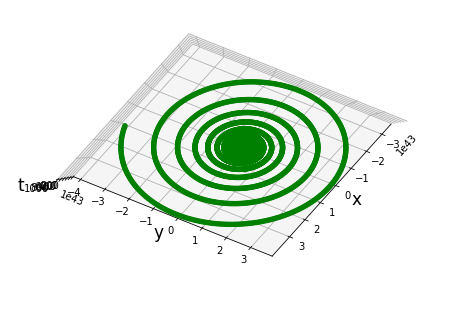

In [42]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(x_l, y_l, t_l, color='green')
plt.show()

#plotly

### <font color='green'> Устойчивость метода Эйлера с центральной точкой: </font>
Для проверки устойчивости решения с помощью метода Эйлера с центральной точкой воспользуемся определением устойчивости задачи, получим следующее соотношение:

\begin{equation*} ||Ax - Ay|| \leq ||A||\cdot||x-y||, \\ A =\begin{pmatrix} 0.1 & 2 \\ -2 & 0.1 \end{pmatrix} \end{equation*}

А из линейности исходного уравнения можем сказать, что оно выполнено: ||A|| = C = const


### Метод Адамса 3 и 4 порядков 

Для решения ОДУ и систем ОДУ существуют *одностадийные методы Адамса* (линейные многошаговые методы). В общем виде методы Адамса могут быть записаны следующим образом:
\begin{equation*} u_{n+1} = u_{n} + \tau\sum_{j=0}^{k-1}n_j\Delta^jf_i \end{equation*}      
Значительно большее значение в вычислительной практике имеют неявные методы Адамса, которые можно записать как:
\begin{equation*} u_{n+1} = u_{n} - \tau\sum_{j=0}^{k}\tilde{\gamma_j}\Delta^jf_{n+1} \end{equation*} 
Первые четыре неявных метода имеют вид:
\begin{equation*} \begin{gathered} k = 0: u_{n+1} = u_{n} + \tau f_{n+1} \\ 
k = 1: u_{n+1} = u_{n} + \tau (\frac12f_{n+1} + \frac12f_n) \\
k = 2: u_{n+1} = u_{n} + \tau (\frac5{12}f_{n+1} + \frac8{12}f_n - \frac1{12}f_{n-1}) \\
k = 3: u_{n+1} = u_{n} + \tau (\frac9{24}f_{n+1} + \frac{19}{24}f_n - \frac5{24}f_{n-1} + \frac1{24}f_{n-2}) \end{gathered}\end{equation*}        

Нас интересуют методы 3 и 4 порядков аппроксимации.
\begin{equation*}  k = 2: Eu_{n+1} = u_{n} + \tau (\frac5{12}Au_{n+1} + \frac8{12}Au_n - \frac1{12}Au_{n-1}) \\
(E - \frac{5\tau}{12}A)u_{n+1} = (E+\frac8{12}A\tau)u_n - \frac{\tau}{12}Au_{n-1} \\
u_{n+1} = (E-\frac{5\tau}{12}A)^{-1}((E+\frac8{12}A){\tau}u_n - \frac{\tau}{12}Au_{n-1}) \end{equation*} 

\begin{equation*} k = 3: Eu_{n+1} = u_{n} + \tau (\frac9{24}Au_{n+1} + \frac{19}{24}Au_n - \frac5{24}Au_{n-1} + \frac1{24}Au_{n-2}) \\
(E-\frac{9\tau}{24}A)u_{n+1} = u_n +\frac{19}{24}{\tau}Au_n - \frac{5}{24}{\tau}Au_{n-1} + \frac{\tau}{24}u_{n-2} \\
u_{n+1} = (E-\frac{9\tau}{24}A)^{-1}(u_n+\frac{19}{24}{\tau}Au_n-\frac5{24}{\tau}Au_{n-1}+\frac{\tau}{24}u_{n-2})
\end{equation*} 

В выводе формат данных представлен в виде данных в точке сначала для метода Адамса порядка 3, потом 4. После этого переходим к следующей точке.

In [31]:
h = 0.01
x_0 = 1.0
y_0 = 1.0

dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}
results_Euler_third = pd.DataFrame(data=data)

M1 = np.array([[(1/h - 0.1), -2.0], [2.0, (1/h - 0.1)]])
v1 = np.array([(1/h)*x_0, (1/h)*y_0])
solut1 = np.linalg.solve(M1, v1)

x_1 = solut1[0]
y_1 = solut1[1]

M2 = np.array([[(1/h - 0.1), -2.0], [2.0, (1/h - 0.1)]])
v2 = np.array([(1/h)*x_1, (1/h)*y_1])
solut2 = np.linalg.solve(M2, v2)

x_2 = solut2[0]
y_2 = solut2[1]

M3 = np.array([[(1/h - 0.1), -2.0], [2.0, (1/h - 0.1)]])
v3 = np.array([(1/h)*x_2, (1/h)*y_2])
solut3 = np.linalg.solve(M3, v3)

x_3 = solut3[0]
y_3 = solut3[1]

#print('t= 0.01', "x=", x_1, " y=", y_1)
#print('t= 0.02', "x=", x_2, " y=", y_2)

# нужно две итерции метода Эйлера, для того чтобы найти u_{n-1} u_{n-2} 
# для методов Адамса 3 и 4 порядков соответсвенно

E = np.matrix(((1.0, 0.0), (0.0, 1.0)))
A = np.matrix(((0.1, 2.0), (-2.0, 0.1)))
i=0
t = 0.02

ad3_sol00 = np.array([[x_0], [y_0]])
ad3_sol11 = np.array([[x_1], [y_1]])
ad3_sol22 = np.array([[x_2], [y_2]])

ad4_sol00 = np.array([[x_0], [y_0]])
ad4_sol11 = np.array([[x_1], [y_1]])
ad4_sol22 = np.array([[x_2], [y_2]])
ad4_sol33 = np.array([[0], [0]])

adams3_x = []
adams3_y = []
adams3_t = []

while True:  
    ad3_sol22 = (np.linalg.inv(E - 5*h/12 * A)) * ((E + 8*h/12 * A) * ad3_sol11 - (h/12*A) * ad3_sol00)
    ad3_sol00 = ad3_sol11
    ad3_sol11 = ad3_sol22
    
    ad4_sol33 = (np.linalg.inv(E - 9*h/24 * A)) * ((E + 19*h/24 * A)*ad4_sol22 - 5*A*h/24*ad4_sol11 + A*h/24 * ad4_sol00)
    ad4_sol00 = ad4_sol11
    ad4_sol11 = ad4_sol22
    ad4_sol22 = ad4_sol33

    t += 0.01
    
    adams3_x.append(ad3_sol22[0])
    adams3_y.append(ad3_sol22[1])
    adams3_t.append(t)
    
    if round(t, 3) == dots[i]:
            print(i, dots[i], "x=", ad3_sol22[0], " y=", ad3_sol22[1])
            print(i, dots[i], "x=", ad4_sol22[0], " y=", ad4_sol22[1])
            i += 1
            
    if i >= 4:
        break

0 1.0 x= [[0.57348887]]  y= [[-1.45191731]]
0 1.0 x= [[0.54474753]]  y= [[-1.4642757]]
1 10.0 x= [[3.6133168]]  y= [[-1.298778]]
1 10.0 x= [[3.58944213]]  y= [[-1.37193558]]
2 100.0 x= [[-9091.80700195]]  y= [[29756.85592487]]
2 100.0 x= [[-8500.17931236]]  y= [[29955.0041669]]
3 1000.0 x= [[1.58128646e+43]]  y= [[-3.45481565e+43]]
3 1000.0 x= [[1.51153139e+43]]  y= [[-3.4865075e+43]]


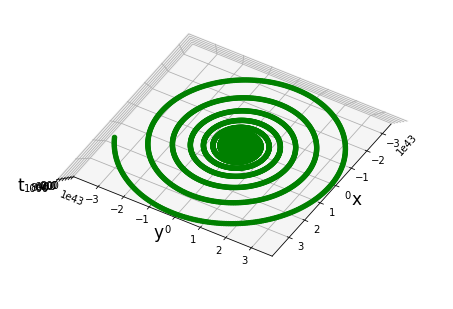

In [32]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(adams3_x, adams3_y, adams3_t, color='green')
plt.show()

#plotly

Для метода Адамса 3 порядка аппроксимации построили график, описывающий поведение траектории в точке. 

### <font color='green'>Метод Дормана-Принса </font>

Метод Дормана-Принса - один из современных методов решения нежестких систем ОДУ, дающий наилучшие результаты. Он обладает наименьшей погрешностью среди всех схем порядка 8.

In [15]:
dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}

h = 0.01
t = 0

A = np.matrix(((0.1, 2.0), (-2.0, 0.1)))

u_n1 = np.array([[0.0], [0.0]])
u_n  = np.array([[1.0], [1.0]])

rungkut_coef = [u_n1, u_n1, u_n1, u_n1, u_n1, u_n1, u_n1, u_n1]

B = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
[1/18, 1/18, 0, 0, 0, 0, 0, 0],
[1/12, 1/48, 1/16, 0, 0, 0, 0, 0],
[1/8, 1/32, 0, 3/32, 0, 0, 0, 0],
[5/16, 5/16, 0, -75/64, 75/64,0, 0, 0],
[3/8, 3/80, 0, 0, 3/16, 3/20, 0, 0],
[59/400, 29443841/614563906, 0, 0, 77736538/692538347, -28693883/1112000000, 23124283393/1800000000, 0],
[93/200, 16016141/946692911, 0, 0, 61564180/158732637, 22789713/633445777, 545815736/2771057229, -180193667/1043307555], 
[0, 0, 0, 0, 0, -59238493/1068277825, 181606676/758867731, 561292985/797845732]])
R = 8

def CompRunKutCoef(v_n): # r - порядок коэффициента, v_n - предыдущее решение
    rungkut_coef.append(A * v_n)
    
    for i in range(1, R):
        coef_sum = np.array([[0.0], [0.0]])
        
        #if i == 1:
        #    rungkut_coef[1] = np.array(A * v_n)

        for j in range(1, i):
            #print("B * rung = ", np.array(B[i][j] * rungkut_coef[j]))    
            coef_sum += np.array(B[i][j] * rungkut_coef[j])

        #print("coef_sum = ", coef_sum)
        rungkut_coef[i] = A * (v_n + h * coef_sum)
        #print("rungkut_coef = ", rungkut_coef)

#CompRunKutCoef(u_n)
#print(rungkut_coef)
        
l = 0
while True:  
    coef_sum = 0

    CompRunKutCoef(u_n)

    #print(rungkut_coef)
    
    for k in range(1, R):
        coef_sum += np.array(B[R - 1][k] * rungkut_coef[k - 1])

    #print(coef_sum)
        
    u_n1 = u_n + h * np.array(coef_sum)
    u_n  = u_n1
    
    t += 0.01
    
    if round(t, 3) == dots[l]:
            print(l, dots[l], "x=", u_n1[0], " y=", u_n1[1])
            #results_Euler_third.at[i, 'X'] = x_next
            #results_Euler_third.at[i, 'Y'] = y_next
            l += 1
            
    if l >= 4:
        break        

0 1.0 x= [1.47578617]  y= [-0.16353641]
1 10.0 x= [-0.72025726]  y= [-2.18639989]
2 100.0 x= [125.15492192]  y= [-135.78276841]
3 1000.0 x= [-1.89378438e+21]  y= [-7.52734096e+20]


### <font color=green>  В. Метод трапеций </font>

Воспользуемся формулой для метода трапеций:
\begin{equation*} u_{n+1} = u_{n} + \tau(\frac{f_{n+1}+f_n}2) \end{equation*}
\begin{equation*} \begin{pmatrix} x_{n+1} \\ y_{n+1} \end{pmatrix} = \begin{pmatrix} 1 - 0.1\frac\tau2 & -2 \\ 2 & 1 - 0.1\frac\tau2 \end{pmatrix}^{-1}(E+\frac\tau2 A) \begin{pmatrix} x \\ y \end{pmatrix}, \end{equation*}
\begin{equation*} где \mspace{10mu} E = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix},\mspace{10mu} A =\begin{pmatrix} 0.1 & 2 \\ -2 & 0.1 \end{pmatrix} \end{equation*}
Результат также увидим в последующей таблице

In [43]:
h = 0.01
E = np.array([[1.0, 0], [0, 1.0]])
A = np.array([[0.1, 2], [-2, 0.1]])
B = (np.linalg.inv(E - h / 2 * A)) * (E + h / 2 * A)
B = [[1.00080022, 0.02001801], [-0.02001801, 1.00080022]]
t = 0
x_n = 1.0
y_n = 1.0

x_list = []
y_list = []
t_list = []
dots = [1.0, 10.0, 100.0, 1000.0]
data = {'T': [1, 10, 100, 1000], 'X': ['x', 'x', 'x', 'x'], 'Y': ['y', 'y', 'y', 'y']}
results_trapeze = pd.DataFrame(data=data)

i = 0 
while i != 4:
        x_n_1 = B[0][0] * x_n + B[0][1] * y_n
        y_n_1 = B[1][0] * x_n + B[1][1] * y_n
        x_n = x_n_1
        y_n = y_n_1
        
        t += 0.01
        
        x_list.append(x_n)
        y_list.append(y_n)
        t_list.append(t)
        
        if round(t, 3) == dots[i]:
            results_trapeze.at[i, 'X'] = x_n
            results_trapeze.at[i, 'Y'] = y_n
            i += 1

In [44]:
results_trapeze

,T,X,Y
0,1,0.545107,-1.46479
1,10,3.59147,-1.36984
2,100,-8694.38,29879.8
3,1000,1.72267e+43,-3.3464e+43


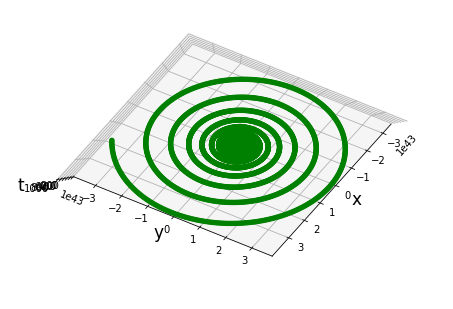

In [34]:
fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(np.array(x_list), np.array(y_list), np.array(t_list), color='green')
plt.show()

#plotly

### <font color='green'>Е. Устойчивость метода Эйлера с центральной точкой (общий вид). </font>

Расчетная формула метода получается из аппроксимации производной в левой части уравнения \begin{equation*} y'=ay, y(t_0)=y_0 \end{equation*}  в точнке $t_i$ разностью "назад" и имеет вид:
\begin{equation*} u_{n+1} = u_{n-1} + 2hau_n, \end{equation*} получаем разностное уравнение 2-го порядка: \begin{equation*} u_{n+1} - 2hau_nu_n - y_{n-1} = 0 \end{equation*}. Для исследования метода на неусточивость подставляем в разностное уравнение частное решение $u_n = \mu^n$. В результате чего получаем характеристическое уравнение и для устойчивости метода требуется, чтобы все корни характеристического уравнения были по модулю меньше единицы.   
Составляем характеристическое уравнение:
\begin{equation*} \mu^2 - 2ah\mu -1 = 0 \end{equation*}
Его корни:
\begin{equation*} \mu_{1,2} = ah ± \sqrt{a^2h^2+1} \end{equation*}
Видно, что один из корней $|\mu_2|>1$ при a<0, что показывает неустойчивость процесса при любых значениях $ah$. Следовательно, множество абсолютной устойчивости в данном случае всего.

# <font color='green'> Задача №2 </font>

# <font color='green'> Нелинейная система уравнений. </font>

Модель свертывания крови. Система ОДУ, описывающая динамику образования основных метаболитов в реакции свертывания крови:
\begin{equation*} \frac{du_1}{dt}=K_1u_1u_2(1-U_1)\frac{1+K_2u_1}{1+K_3u_3}-u_1,\\ \frac{du_2}{dt}=u_1 -K_4u_2 \\ \frac{du_3}{dt}=K_5u_1^2-K_6u_3 \end{equation*}
    
Особые точки рассматриваемой системы определяются корнями следующего полинома:
\begin{equation*} f(u_1)=u_1(\frac{K_1K_2}{K_4}u_1^3+(\frac{K_1}{K_4}(1-K_2)+\frac{K_3K_5}{K_6})u_1^2-\frac{K_1}{K_4}u_1+1) \end{equation*}

В системе всегда существует нулевая особая точка. Она устойчива при любых значениях параметров. Кроме того, у рассматриваемого полинома всегда есть один отрицательный корень. Соответственно, количество его положительных корней, определяющих особые точки системы, может меняться в зависимости от параметров модели от нуля до двух.    
Удобно рассматривать поведение системы при изменении параметра $K_2$, определяющего скорость наработки активатора и параметра $K_6$,определяющего скорость инактивации ингибитора, поскольку от $K_2$ зависит только первое уравнение системы, от $K_6$ - только третье.       
Построим бифуркационную диаграмму в диапазоне изменения параметра $K_6$ от 0 до 0,2 при фиксированном значении $K_2$. Используемые в модели константы приведены в табл.1.  
До значения $K_6=0,0173$ в системе существует единственная особая точка - нулевая. При $K_6>0,00173$ рождаются еще две особые точки. Первая из них является неустойчивой (при $K_6<0,193$ - это седло-узел, при $K_6>0,193$ - это седло-фокус). При увеличении значения параметра $K_6$ происходит уменьшение соответствующего значения $u_{1ст}$. Вторая особая точка, являющаяся неустойчивой при малых значениях параметра $K_6$ в результате бифуркации Хопфа становится устойчивой ($K_6=0,0692)$. При данном значении параметра $K_2$ вблизи бифуркации Хопфа в рассматриваемой системе уравнений происходит бифуркация рождения устойчивого предельного цикла из петли сепаратриссы (осевой линии) седло-узла.     
Провести расчеты на интервале времени $0<t<=20$ методами Рунге-Кутты первого, второго, третьего и четвертого порядка аппроксимации. Исследуйте зависимость численного решения от шага интегрирования при различных значениях параметра $K_6=0,0173, 0,018, 0,019, 0,02$



### Решение:
для нахождения начальных точек использовались первые три уравнения и факт о том, что в системе всегда существует нулевая особая точка, тогда с помощью Wolphram Alpha были посчитаны начальные условия для каждого значения параметра $K_6$:

| $K_6$ | 0.0173                      | 0.018                   | 0.019                       | 0.02                         |
|-----|-----------------------------|-------------------------|-----------------------------|------------------------------|
| $x_0$ | $\frac{173}{14790}$                   | $\frac{6}{493}$                   | $\frac{19}{1497}$                     | $\frac{20}{1479}$                      |
| $y_0$ | $\frac{17300}{128673}$                | $\frac{2000}{14297}$              | $\frac{19000}{128673}$                | $\frac{20000}{128673}$                |
| $z_0$ | $\frac{768947777105}{66425644607148}$ | $\frac{6368013675}{205017421627}$ | $\frac{982186905175}{16606411151787}$ | $\frac{1453415530175}{16606411151787}$ |

In [26]:
k1 = 6.85
k2 = 11
k3 = 2.36
k4 = 0.087
k5 = 17
k6 = 0.0173

coordinates = [[173/14790, 17300/128673, 768947777105/66425644607148], [6/493, 2000/14297, 6368013675/205017421627],
               [19/1497, 19000/128673, 982186905175/16606411151787], [20/1479, 20000/128673, 1453415530175/16606411151787]]

H = [0.01, 0.1, 0.5, 1.0]
K6 = [0.0173, 0.018, 0.019, 0.02] 
t = 0

data = {'Coordinates': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_1_RC_1 = pd.DataFrame(data=data)
data = {'Coord': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_2_RC_1 = pd.DataFrame(data=data)
data = {'Coord': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_3_RC_1 = pd.DataFrame(data=data)
data = {'Coord': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_4_RC_1 = pd.DataFrame(data=data)

x_n = coordinates[0][0]
y_n = coordinates[0][1]
z_n = coordinates[0][2]

t = 0
h0 = H[0]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_1_RC_1.at[0, 'h1'] = x_n 
        results_k6_1_RC_1.at[1, 'h1'] = y_n
        results_k6_1_RC_1.at[2, 'h1'] = z_n
        i += 1
        break
        
t = 0
h = H[1]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_1_RC_1.at[0, 'h2'] = x_n 
        results_k6_1_RC_1.at[1, 'h2'] = y_n
        results_k6_1_RC_1.at[2, 'h2'] = z_n
        i += 1
        break
        
t = 0
h = H[2]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_1_RC_1.at[0, 'h3'] = x_n 
        results_k6_1_RC_1.at[1, 'h3'] = y_n
        results_k6_1_RC_1.at[2, 'h3'] = z_n
        i += 1
        break
        
t = 0
h = H[3]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_1_RC_1.at[0, 'h4'] = x_n 
        results_k6_1_RC_1.at[1, 'h4'] = y_n
        results_k6_1_RC_1.at[2, 'h4'] = z_n
        i += 1
        break
        
results_k6_1_RC_1

,Coordinates,h1,h2,h3,h4
0,x,0.000225314,2.1895e-11,9.52776e-23,4.03037e-67
1,y,0.0727191,0.0127449,0.00215146,0.000348457
2,z,0.0269121,0.0190355,0.0134476,0.00948559


In [27]:
k1 = 6.85
k2 = 11
k3 = 2.36
k4 = 0.087
k5 = 17
k6 = 0.018

coordinates = [[173/14790, 17300/128673, 768947777105/66425644607148], [6/493, 2000/14297, 6368013675/205017421627],
               [19/1497, 19000/128673, 982186905175/16606411151787], [20/1479, 20000/128673, 1453415530175/16606411151787]]

H = [0.01, 0.1, 0.5, 1.0]
K6 = [0.0173, 0.018, 0.019, 0.02] 
t = 0

data = {'Coordinates': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_2_RC_1 = pd.DataFrame(data=data)

x_n = coordinates[1][0]
y_n = coordinates[1][1]
z_n = coordinates[1][2]
t = 0
h0 = H[0]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_2_RC_1.at[0, 'h1'] = x_n 
        results_k6_2_RC_1.at[1, 'h1'] = y_n
        results_k6_2_RC_1.at[2, 'h1'] = z_n
        i += 1
        break
        
t = 0
h = H[1]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_2_RC_1.at[0, 'h2'] = x_n 
        results_k6_2_RC_1.at[1, 'h2'] = y_n
        results_k6_2_RC_1.at[2, 'h2'] = z_n
        i += 1
        break
        
t = 0
h = H[2]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_2_RC_1.at[0, 'h3'] = x_n 
        results_k6_2_RC_1.at[1, 'h3'] = y_n
        results_k6_2_RC_1.at[2, 'h3'] = z_n
        i += 1
        break
        
t = 0
h = H[3]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_2_RC_1.at[0, 'h4'] = x_n 
        results_k6_2_RC_1.at[1, 'h4'] = y_n
        results_k6_2_RC_1.at[2, 'h4'] = z_n
        i += 1
        break
        
results_k6_2_RC_1

,Coordinates,h1,h2,h3,h4
0,x,0.000318285,3.88217e-11,1.84191e-22,2.7049e-66
1,y,0.0782849,0.0137502,0.00232117,0.000375943
2,z,0.0424574,0.0296131,0.0206267,0.0143436


In [28]:
k1 = 6.85
k2 = 11
k3 = 2.36
k4 = 0.087
k5 = 17
k6 = 0.019

coordinates = [[173/14790, 17300/128673, 768947777105/66425644607148], [6/493, 2000/14297, 6368013675/205017421627],
               [19/1497, 19000/128673, 982186905175/16606411151787], [20/1479, 20000/128673, 1453415530175/16606411151787]]

H = [0.01, 0.1, 0.5, 1.0]
K6 = [0.0173, 0.018, 0.019, 0.02] 
t = 0

data = {'Coordinates': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_3_RC_1 = pd.DataFrame(data=data)

x_n = coordinates[2][0]
y_n = coordinates[2][1]
z_n = coordinates[2][2]
t = 0
h0 = H[0]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_3_RC_1.at[0, 'h1'] = x_n 
        results_k6_3_RC_1.at[1, 'h1'] = y_n
        results_k6_3_RC_1.at[2, 'h1'] = z_n
        i += 1
        break
        
t = 0
h = H[1]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_3_RC_1.at[0, 'h2'] = x_n 
        results_k6_3_RC_1.at[1, 'h2'] = y_n
        results_k6_3_RC_1.at[2, 'h2'] = z_n
        i += 1
        break
        
t = 0
h = H[2]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_3_RC_1.at[0, 'h3'] = x_n 
        results_k6_3_RC_1.at[1, 'h3'] = y_n
        results_k6_3_RC_1.at[2, 'h3'] = z_n
        i += 1
        break
        
t = 0
h = H[3]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_3_RC_1.at[0, 'h4'] = x_n 
        results_k6_3_RC_1.at[1, 'h4'] = y_n
        results_k6_3_RC_1.at[2, 'h4'] = z_n
        i += 1
        break
        
results_k6_3_RC_1

,Coordinates,h1,h2,h3,h4
0,x,0.000264901,2.90328e-11,1.35564e-22,1.94745e-66
1,y,0.0795236,0.013945,0.00235406,0.000381271
2,z,0.0618504,0.0422826,0.028863,0.0196662


In [29]:
k1 = 6.85
k2 = 11
k3 = 2.36
k4 = 0.087
k5 = 17
k6 = 0.02

coordinates = [[173/14790, 17300/128673, 768947777105/66425644607148], [6/493, 2000/14297, 6368013675/205017421627],
               [19/1497, 19000/128673, 982186905175/16606411151787], [20/1479, 20000/128673, 1453415530175/16606411151787]]

H = [0.01, 0.1, 0.5, 1.0]
K6 = [0.0173, 0.018, 0.019, 0.02] 
t = 0

data = {'Coordinates': ['x', 'y', 'z'], 'h1': ['x', 'x', 'x'], 'h2': ['y', 'y', 'y'], 'h3': ['y', 'y', 'y'], 'h4': ['y', 'y', 'y']}
results_k6_4_RC_1 = pd.DataFrame(data=data)

x_n = coordinates[3][0]
y_n = coordinates[3][1]
z_n = coordinates[3][2]
t = 0
h0 = H[0]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_4_RC_1.at[0, 'h1'] = x_n 
        results_k6_4_RC_1.at[1, 'h1'] = y_n
        results_k6_4_RC_1.at[2, 'h1'] = z_n
        i += 1
        break
        
t = 0
h = H[1]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_4_RC_1.at[0, 'h2'] = x_n 
        results_k6_4_RC_1.at[1, 'h2'] = y_n
        results_k6_4_RC_1.at[2, 'h2'] = z_n
        i += 1
        break
        
t = 0
h = H[2]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_4_RC_1.at[0, 'h3'] = x_n 
        results_k6_4_RC_1.at[1, 'h3'] = y_n
        results_k6_4_RC_1.at[2, 'h3'] = z_n
        i += 1
        break
        
t = 0
h = H[3]

while True:
    x_n_1 = x_n + h*(k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n)
    y_n_1 = y_n + h*(x_n - k4*y_n)
    z_n_1 = z_n + h*(k5*(x_n**2)-k6*z_n)

    x_n = x_n_1
    y_n = y_n_1
    z_n = z_n_1
    t += h
    if round(t, 3) == 20:
        results_k6_4_RC_1.at[0, 'h4'] = x_n 
        results_k6_4_RC_1.at[1, 'h4'] = y_n
        results_k6_4_RC_1.at[2, 'h4'] = z_n
        i += 1
        break
        

In [30]:
def Runge_Cutta_1(x_n, y_n, z_n):
    K0x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K0y = x_n - k4*y_n
    K0z = k5*(x_n**2)-k6*z_n
    
    x_n_1 = x_n + h*1*K0x
    y_n_1 = y_n + h*1*K0y
    z_n_1 = z_n + h*1*K0z
    
    return(x_n_1, y_n_1, z_n_1)

def Runge_Cutta_2(x_n, y_n, z_n):
    K0x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K0y = x_n - k4*y_n
    K0z = k5*(x_n**2)-k6*z_n
    
    x_n = x_n + h*1*K0x
    y_n = y_n + h*1*K0y
    z_n = z_n + h*1*K0z
    
    K1x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K1y = x_n - k4*y_n
    K1z = k5*(x_n**2)-k6*z_n
    
    x_n_1 = x_n + h*0.5*K1x
    y_n_1 = y_n + h*0.5*K1y
    z_n_1 = z_n + h*0.5*K1z
    
    return(x_n_1, y_n_1, z_n_1)

def Runge_Cutta_3(x_n, y_n, z_n):
    K0x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K0y = x_n - k4*y_n
    K0z = k5*(x_n**2)-k6*z_n
    
    x_n = x_n + h*1*K0x
    y_n = y_n + h*1*K0y
    z_n = z_n + h*1*K0z
    
    K1x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K1y = x_n - k4*y_n
    K1z = k5*(x_n**2)-k6*z_n
    
    x_n = x_n + h*(0*K1x + K1x)
    y_n = y_n + h*(0*K1y + K1y)
    z_n = z_n + h*(0*K1z + K1z)
    
    K2x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K2y = x_n - k4*y_n
    K2z = k5*(x_n**2)-k6*z_n
    
    x_n_1 = x_n + h*(1/6*K0x +2/3*K1x+1/6*K2x)
    y_n_1 = y_n + h*(1/6*K0y +2/3*K1y+1/6*K2y)
    z_n_1 = z_n + h*(1/6*K0z +2/3*K1z+1/6*K2z)
    
    return(x_n_1, y_n_1, z_n_1)
    
def Runge_Cutta_4(x_n, y_n, z_n):
    K0x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K0y = x_n - k4*y_n
    K0z = k5*(x_n**2)-k6*z_n
    
    x_n = x_n + h*1*K0x
    y_n = y_n + h*1*K0y
    z_n = z_n + h*1*K0z
    
    K1x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K1y = x_n - k4*y_n
    K1z = k5*(x_n**2)-k6*z_n
    
    x_n = x_n + h*(0*K0x + K1x)
    y_n = y_n + h*(0*K0y + K1y)
    z_n = z_n + h*(0*K0z + K1z)
    ''
    K2x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K2y = x_n - k4*y_n
    K2z = k5*(x_n**2)-k6*z_n

    #для К4
    x_n = x_n + h*(0*K0x + 0*K1x + 1*K2x)
    y_n = y_n + h*(0*K0y + 0*K1y + 1*K2y)
    z_n = z_n + h*(0*K0z + 0*K1z + 1*K2z)

    K3x = k1*x_n*y_n*(1-x_n)*(1+k2*x_n)/(1+k3*z_n)-x_n
    K3y = x_n - k4*y_n
    K3z = k5*(x_n**2)-k6*z_n

    #Для подсчета РК 4 порядка:
    x_n_1 = x_n + h*(1/6*K0x + 2/6*K1x + 2/6*K2x + 1/6*K3x)
    y_n_1 = y_n + h*(1/6*K0y + 2/6*K1y + 2/6*K2y + 1/6*K3y)
    z_n_1 = z_n + h*(1/6*K0z + 2/6*K1z + 2/6*K2z + 1/6*K3z)
    
    return(x_n_1, y_n_1, z_n_1)

In [31]:
print(results_k6_1_RC_1) 
print(results_k6_2_RC_1) 
print(results_k6_3_RC_1) 
print(results_k6_4_RC_1)

  Coordinates           h1          h2           h3           h4
0           x  0.000225314  2.1895e-11  9.52776e-23  4.03037e-67
1           y    0.0727191   0.0127449   0.00215146  0.000348457
2           z    0.0269121   0.0190355    0.0134476   0.00948559
  Coordinates           h1           h2           h3           h4
0           x  0.000318285  3.88217e-11  1.84191e-22   2.7049e-66
1           y    0.0782849    0.0137502   0.00232117  0.000375943
2           z    0.0424574    0.0296131    0.0206267    0.0143436
  Coordinates           h1           h2           h3           h4
0           x  0.000264901  2.90328e-11  1.35564e-22  1.94745e-66
1           y    0.0795236     0.013945   0.00235406  0.000381271
2           z    0.0618504    0.0422826     0.028863    0.0196662
  Coordinates           h1           h2           h3           h4
0           x  0.000985495  3.01721e-10  2.02135e-21  2.19501e-63
1           y    0.0989004    0.0176325   0.00297656  0.000482092
2           z 

### <font color='green' > Вывод: </font>
Сверху можно увидеть 4 таблички для 4 разных параметров $K_6$ ($K_6$ = [0.0173, 0.018, 0.019, 0.02]) посчитанные значения x, y, z при разных шагах (h = [0.01, 0.1, 0.5, 1.0]). Из полученных данных можно сделать вывод, что, чем больше шаг, тем больше погрешность.  

# <font color='green'> Задача №3 </font>

## <font color='green'> Особые точки и особые траектории. </font>

### Условие: 
Для взаимоотношений "хищник-жертва" или "паразит-хозяин" модель Лотки-Вольтерры имеет вид: \begin{equation*} \frac{dy_1}{dt} = \varepsilon_1y_1(1-a_{11}y_1-a_{12}y_2), \\ \frac{dy_2}{dt} = \varepsilon_2y_2(c+a_{21}y_1 - a_{22}y_2), \end{equation*} где $y_1$-плотность популяции хозяев, а $y_2$-плотность популяции паразитов. Все параметры задачи положительны, у системы имеется четыре особые точки, причем точка (0,0) является особой. Определить характер и устойчивость этих особых точек. Исследовать поведение фазовых траекторий для системы ОДУ вблизи "ненулевых" особых точек с помощью двух методов Рунге-Кутты (первого и четвертого порядка аппроксимации). Объяснить поведение фазовых траекторий, значения параметров $\varepsilon_1 = 2, \varepsilon_2 = 0,5, a_{11}=1, a_{12}=2, a_{21} = 2, a_{22} = 5.$             
         
### Решение:
Найдем четыре особые точки. Если в положении равновесия $f(x_0)=0$, можем рассмотреть систему из двух уравнений для нахождения особых точек, подставив константы в первоначальную модель:
\begin{equation*} \left\{\begin{aligned}2x(1-x-2y)=0 \\ \frac12y(c+2x-5y) =0 \end{aligned} \right.  \end{equation*}
            
Пусть x = 0, тогда $y=0$ и $y=\frac{c}2$ Отсюда получаем две точки: $(0;\frac{c}5)$ и $(0; 0)$  
Теперь пусть y = 0, получаем точки $(1; 0)$. И еще одна точка $(\frac59-\frac{2c}9; \frac{c}9+\frac29).$      
         
Матрица Якоби в общем виде выглядит следующим образом:
\begin{equation*} A = \begin{pmatrix} f'_x & f'_y \\ g'_x & g'_y \end{pmatrix} \end{equation*}
Для нашей задачи:
\begin{equation*} A = \begin{pmatrix} 2-4x-4y & -4x \\ y & \frac{c}2+x-5y \end{pmatrix} \end{equation*}
        
Рассмотрим **точку 1: (0,0)**, подставим в матрицу А:
\begin{equation*} A_1 = \begin{pmatrix} 2 & 0 \\ 0 & \frac{c}2 \end{pmatrix} \end{equation*}
Характеристические корни: $\lambda_1=c$, $\lambda_2=\frac{c}2$            
Считая, что $\lambda_1>0$ и $\lambda_2=c$, a $c>0$ (по условию), то два характеристических корня действительные положительные - это неустойчивый узел (параболы).
    
Рассмотрим **точку 2: (1,0)**, подставим в матрицу А:
\begin{equation*} A_2 = \begin{pmatrix} -2 & -4 \\ 0 & \frac{c}2+1 \end{pmatrix} \end{equation*}
Характеристические корни: $\lambda_1=-2$, $\lambda_2=\frac{c+2}2$         
Считая, что $\lambda_1<0$ и $\lambda_2=\frac{c+2}2>0$, т.к $c>0$ (по условию), то два характеристических корня действительные разных знаков - это седло (гиперболы).
           
Рассмотрим **точку 3: (0,$\frac{c}5$)**, подставим в матрицу А:
\begin{equation*} A_3 = \begin{pmatrix} 2-\frac{4c}5 & 0 \\ \frac{c}5 & \frac{c}2-с \end{pmatrix} \end{equation*}
Характеристические корни: $\lambda_1=-\frac{c}2$, $\lambda_2=\frac{-4c+10}5$         
Считая, что $\lambda_1<0, если c>10/4, и \lambda_1>0, если c<10/4$ и $\lambda_2=\frac{-4c+10}5<0$, т.к $c>0$ (по условию). В случае, когда два характеристических корня действительные разных знаков - это седло (гиперболы), когда два характеристических корня действительные отрицательные - это устойчивый узел (параболы).      
    
Рассмотрим **точку 4: $(\frac59-\frac{2c}9; \frac{c}9+\frac29)$**, подставим в матрицу А:
\begin{equation*} A_3 = \begin{pmatrix} 2-\frac49(7-c) & -\frac49(5-2c) \\ \frac19(c+2) & \frac{c}2-\frac{7c}9-\frac59 \end{pmatrix} \end{equation*}
Характеристические корни: $\lambda_1=\frac1{12}(-\sqrt{3}\sqrt{11c^2-12c-20}+c-10)$, $\lambda_2=\frac1{12}(\sqrt{3}\sqrt{11c^2-12c-20}+c-10)$       
В зависимости от константы можем получить различные значения характеристических корней: как с положительной, так и с отрицательной мнимой частями. От этого будет зависеть неустойчив или, соответственно, устойчив узел.

** Метод Рунге-Кутта 1 порядка (метод Эйлера)** 

In [43]:
initial_dots = [[1.1, 0.1], [0.95, 0.05], [1.5, 0.2], [0.1, c/5+0.1], [0.3, c/5+0.3], [1, c/5+1], [5/9-2*c/9+0.1, c/9+2/9+0.1], [5/9-2*c/9+0.4, c/9+2/9+0.4], [5/9-2*c/9+0.7, c/9+2/9+0.7]]
x_list = [[],[],[],[],[],[],[],[],[]]
y_list = [[],[],[],[],[],[],[],[],[]]
t = 0
h = 0.01
c = 10 #пусть
tlst = []

for i in range(len(initial_dots)):
    x_n = initial_dots[i][0]
    y_n = initial_dots[i][1]
    while True:
        x_list[i].append(x_n)
        y_list[i].append(y_n)
        tlst.append(t)

        x_n_1 = x_n + h*(2*x_n*(1-x_n-2*y_n))
        y_n_1 = y_n + h*(0.5*y_n*(c+2*x_n-5*y_n))

        x_n = x_n_1
        y_n = y_n_1

        t += 0.1

        if round(t, 3) == 10000:
            print(i, "x =", x_n, " y =", y_n)
            break
    t=0

0 x = 4e-323  y = 2.0000000000000044
1 x = 4e-323  y = 1.9999999999999978
2 x = 4e-323  y = 2.0000000000000044
3 x = 4e-323  y = 2.0000000000000044
4 x = 4e-323  y = 2.0000000000000044
5 x = 4e-323  y = 2.0000000000000044
6 x = -4e-323  y = 1.9999999999999978
7 x = -4e-323  y = 1.9999999999999978
8 x = -4e-323  y = 1.9999999999999978


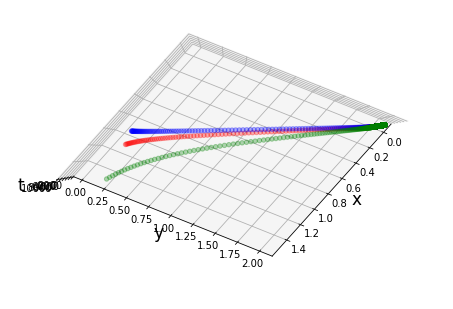

In [48]:
fig = plt.figure()
ax = Axes3D(fig)

POINTS_F_NUM = 100000

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(np.array(x_list[0]), np.array(y_list[0]), np.array(tlst)[:POINTS_F_NUM], color='red')
ax.scatter(np.array(x_list[1]), np.array(y_list[1]), np.array(tlst)[:POINTS_F_NUM], color='blue')
ax.scatter(np.array(x_list[2]), np.array(y_list[2]), np.array(tlst)[:POINTS_F_NUM], color='green')
plt.show()

#plotly

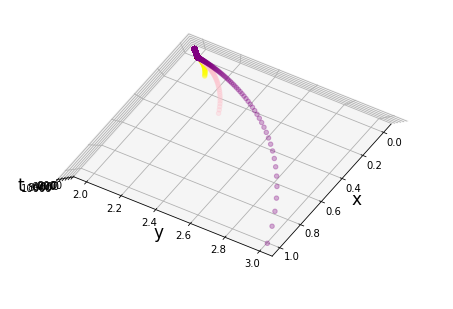

In [49]:
fig = plt.figure()
ax = Axes3D(fig)

POINTS_F_NUM = 100000

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(np.array(x_list[3]), np.array(y_list[3]), np.array(tlst)[:POINTS_F_NUM], color='yellow')
ax.scatter(np.array(x_list[4]), np.array(y_list[4]), np.array(tlst)[:POINTS_F_NUM], color='pink')
ax.scatter(np.array(x_list[5]), np.array(y_list[5]), np.array(tlst)[:POINTS_F_NUM], color='purple')
plt.show()

#plotly

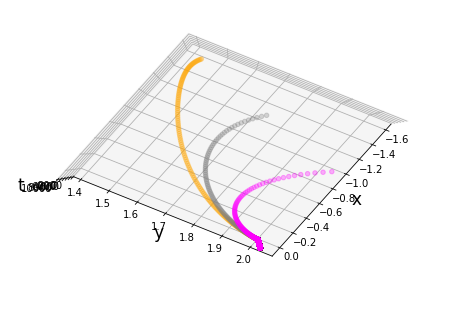

In [50]:
fig = plt.figure()
ax = Axes3D(fig)

POINTS_F_NUM = 100000

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(np.array(x_list[6]), np.array(y_list[6]), np.array(tlst)[:POINTS_F_NUM], color='orange')
ax.scatter(np.array(x_list[7]), np.array(y_list[7]), np.array(tlst)[:POINTS_F_NUM], color='grey')
ax.scatter(np.array(x_list[8]), np.array(y_list[8]), np.array(tlst)[:POINTS_F_NUM], color='magenta')
plt.show()

#plotly

<font color=green> ** Метод Рунге-Кутта 4 порядка** </font>

\begin{equation*} u_{n+1} = u_n +\tau(\gamma_1*K_1+\gamma_2*K_2+\gamma_3*K_3+\gamma_4*K_4) \\ K_1 = f(t_n, u_n) \\ K_2 = f(t_n +\alpha_2\tau, u_n+\tau\beta_{21}K_1) \\ K_3 = f(t_n+\alpha_3\tau, u_n+\tau(\beta_{31}K_1+\beta_{32}K_2)) \\ K_4 = f(t_n +\alpha_4\tau, u_n + \tau(\beta_{41}K_1+\beta_{42}K_2+\beta_{43}K_3))\end{equation*}

In [52]:
initial_dots = [[1.1, 0.1], [0.95, 0.05], [1.5, 0.2], [0.1, c/5+0.1], [0.3, c/5+0.3], [1, c/5+1], [5/9-2*c/9+0.9, c/9+2/9+0.9], [5/9-2*c/9+1.2, c/9+2/9+1.2], [5/9-2*c/9+0.7, c/9+2/9+0.7]]
x_list = [[],[],[],[],[],[],[],[],[]]
y_list = [[],[],[],[],[],[],[],[],[]]

def Runge_Cutta_4(x_n, y_n):
    #для К1                                                                                                                                                                                                                                                                                                                                                                                                                                
    x_n_1 = x_n + h*(2*x_n*(1-x_n-2*y_n))
    y_n_1 = y_n + h*(0.5*y_n*(c+2*x_n-2*y_n))

    x_n = x_n_1
    y_n = y_n_1
        
    K1x = 2*x_n*(1-x_n-2*y_n)
    K1y = 0.5*y_n*(c+2*x_n-2*y_n)

    #для К2
    x_n = x_n + h*0.5*K1x
    y_n = y_n + h*0.5*K1y

    K2x = 2*x_n*(1-x_n-2*y_n)
    K2y = 0.5*y_n*(c+2*x_n-2*y_n)

    #для К3
    x_n = x_n + h*(0*K1x + K2x)
    y_n = y_n + h*(0*K1y + K2y)

    K3x = 2*x_n*(1-x_n-2*y_n)
    K3y = 0.5*y_n*(c+2*x_n-2*y_n)

    #для К4
    x_n = x_n + h*(0*K1x + 0*K2x + 1*K3x)
    y_n = y_n + h*(0*K1y + 0*K2y + 1*K3y)

    K4x = 2*x_n*(1-x_n-2*y_n)
    K4y = 0.5*y_n*(c+2*x_n-2*y_n)

    #Для подсчета РК 4 порядка:
    x_n_1 = x_n + h*(1/6*K1x + 2/6*K2x + 2/6*K3x + 1/6*K4x)
    y_n_1 = y_n + h*(1/6*K1y + 2/6*K2y + 2/6*K3y + 1/6*K4y)
    
    return(x_n_1, y_n_1)

t=0
h=0.01
c = 2 #пусть

tlst = []

for i in range(len(initial_dots)):
    x_n = initial_dots[i][0]
    y_n = initial_dots[i][1]
    
    while True:
        x_list[i].append(x_n)
        y_list[i].append(y_n)
        tlst.append(t)

        ans = Runge_Cutta_4(x_n, y_n)

        x_n = ans[0]
        y_n = ans[1]

        t += 0.1

        if round(t, 3) == 1000:
            print(i, "x =", x_n, " y =", y_n)
            break
    t=0

0 x = 1.2e-322  y = 1.0000000000000107
1 x = 1.2e-322  y = 0.9999999999999974
2 x = 1.2e-322  y = 1.0000000000000107
3 x = 1.2e-322  y = 0.9999999999999946
4 x = 1.2e-322  y = 0.9999999999999974
5 x = 1.2e-322  y = 1.0000000000000109
6 x = 1.2e-322  y = 1.0000000000000107
7 x = 1.2e-322  y = 1.0000000000000109
8 x = 1.2e-322  y = 1.0000000000000107


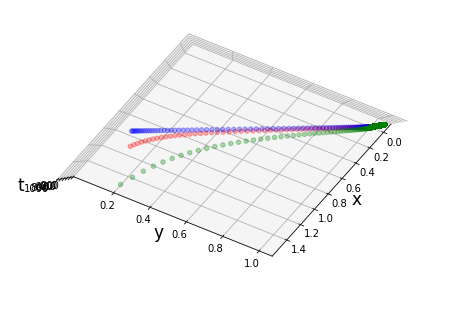

In [54]:
fig = plt.figure()
ax = Axes3D(fig)

POINTS_F_NUM = 10000

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(np.array(x_list[0]), np.array(y_list[0]), np.array(tlst)[:POINTS_F_NUM], color='red')
ax.scatter(np.array(x_list[1]), np.array(y_list[1]), np.array(tlst)[:POINTS_F_NUM], color='blue')
ax.scatter(np.array(x_list[2]), np.array(y_list[2]), np.array(tlst)[:POINTS_F_NUM], color='green')
plt.show()

#plotly

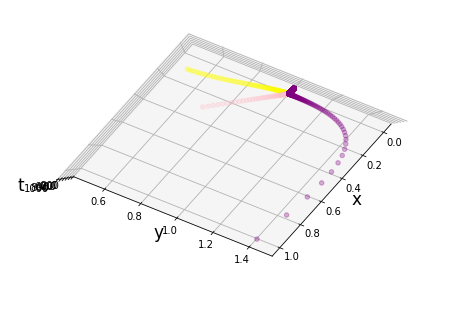

In [55]:
fig = plt.figure()
ax = Axes3D(fig)

POINTS_F_NUM = 10000

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(90, 30)
ax.scatter(np.array(x_list[3]), np.array(y_list[3]), np.array(tlst)[:POINTS_F_NUM], color='yellow')
ax.scatter(np.array(x_list[4]), np.array(y_list[4]), np.array(tlst)[:POINTS_F_NUM], color='pink')
ax.scatter(np.array(x_list[5]), np.array(y_list[5]), np.array(tlst)[:POINTS_F_NUM], color='purple')
plt.show()

#plotly

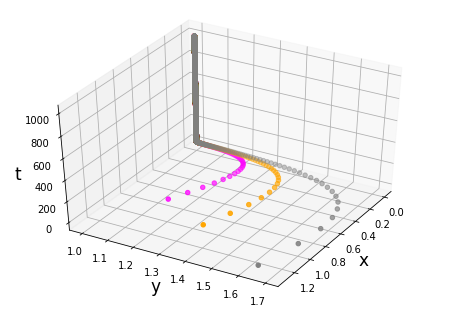

In [57]:
fig = plt.figure()
ax = Axes3D(fig)

POINTS_F_NUM = 10000

ax.set_xlabel('x', fontsize=17)
ax.set_ylabel('y', fontsize=17)
ax.set_zlabel('t', fontsize=17)
ax.view_init(40, 30)
ax.scatter(np.array(x_list[6]), np.array(y_list[6]), np.array(tlst)[:POINTS_F_NUM], color='orange')
ax.scatter(np.array(x_list[7]), np.array(y_list[7]), np.array(tlst)[:POINTS_F_NUM], color='grey')
ax.scatter(np.array(x_list[8]), np.array(y_list[8]), np.array(tlst)[:POINTS_F_NUM], color='magenta')
plt.show()

#plotly

### Вывод: 
В ходе решения данной задачи использовалось 2 метода исследования окрестностей изучаемых ненулевых особых точек: каждый график - это отдельная особая точка. Здесь мы видим случаи, когда t>0, поэтому, грубо говоря, нам видна только часть фазовой плоскости, но этого в целом достаточно, чтобы убедиться в справедливости посчитанных в первой части задачи данных. Точка В (второй график в двух методах) оказывается неудачной. Поведение фазовых траекторий везде по сути одно и то же: в начале, ближе к значению в точке, результаты совпадают больше всего. Чем дальше от исследуемой точки, тем больше они расходятся.